In [ ]:
!pip install mtcnn

In [ ]:
!pip install keras_facenet

**Importing Libraries**

In [ ]:
from mtcnn import MTCNN
from keras_facenet import FaceNet
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
from skimage import  io
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
folder_path = '/content/drive/My Drive/Images/Neymar'
print(os.listdir(folder_path))


['2.jpg', '1.jpg']


In [ ]:
from PIL import Image

img = Image.open(folder_path + '/2.jpg')  # replace with a real file name
img.show()


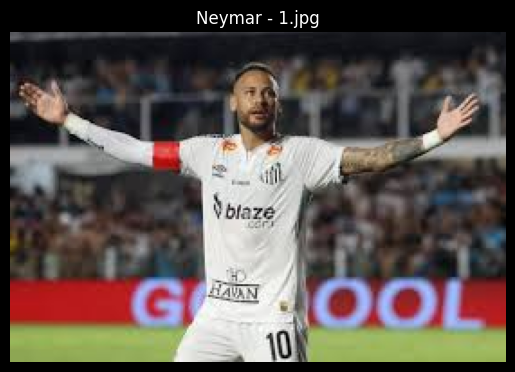

In [ ]:
from PIL import Image
import os
import matplotlib.pyplot as plt

file_path = '/content/drive/My Drive/Images/Neymar/1.jpg'

if os.path.exists(file_path):
    img = Image.open(file_path)

    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.title("Neymar - 1.jpg")
    plt.show()
else:
    print("❌ File does not exist.")


**Images**

In [ ]:
image1_cr7 ='/content/drive/My Drive/Images/cristiano/1.jpg'
image2_cr7 ='/content/drive/My Drive/Images/cristiano/2.jpg'

In [ ]:
image1_messi = '/content/drive/My Drive/Images/messi/1.jpg'
image2_messi = '/content/drive/My Drive/Images/messi/2.webp'

In [ ]:
image1_Neymar='/content/drive/My Drive/Images/Neymar/1.jpg'
image2_Neymar='/content/drive/My Drive/Images/Neymar/2.jpg'

In [ ]:
image1_mbappe='/content/drive/My Drive/Images/mbappe/1.webp'
image2_mbappe='/content/drive/My Drive/Images/mbappe/2.jpg'

In [ ]:
image1_Halaand='/content/drive/My Drive/Images/Haalaand/1.webp'
image2_Halaand='/content/drive/My Drive/Images/Haalaand/2.jpg'

In [ ]:
image_list = [image1_cr7,image2_cr7,image1_messi,image2_messi,image1_Neymar,image2_Neymar,image1_mbappe,image2_mbappe,image1_Halaand,image2_Halaand]

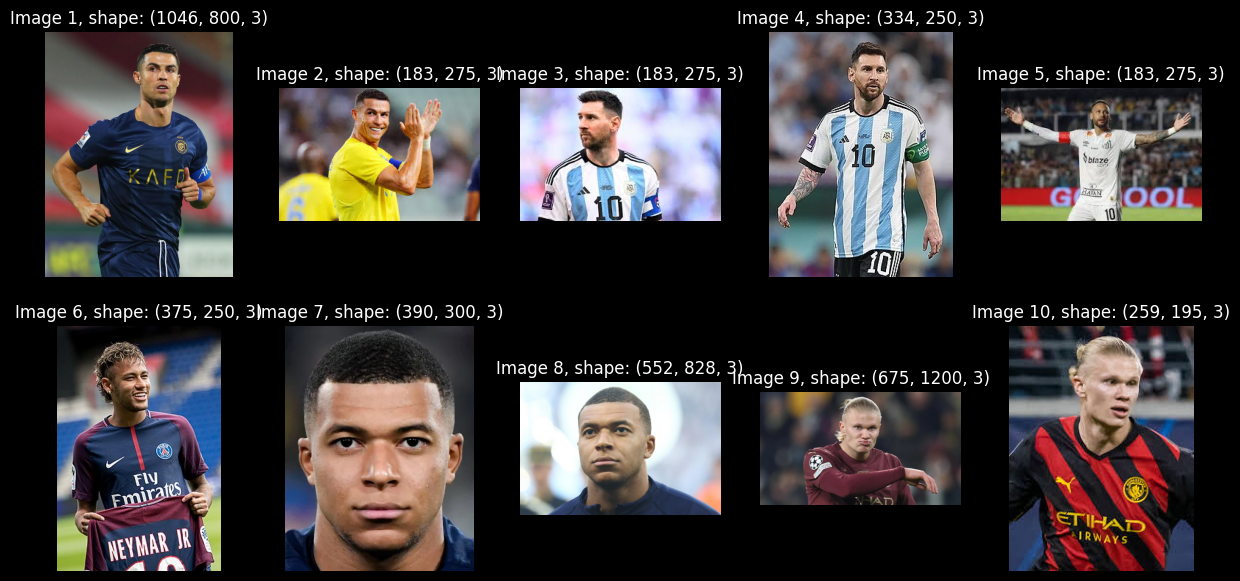

In [ ]:
plt.figure(figsize=(15, 7))  # Set the overall figure size

for i in range(10):
    plt.subplot(2, 5, i + 1)  # Create a 2x5 grid of subplots
    img = plt.imread(image_list[i])  # Read image at index i
    plt.imshow(img)  # Show the image
    plt.axis('off')  # Hide the axis
    plt.title(f"Image {i+1}, shape: {img.shape}")  # Display image number and shape



In [ ]:
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN
from skimage import io

class Color:
    BOLD = '\033[1m'
    END = '\033[0m'
    RED = '\033[91m'
    GREEN = '\033[92m'
    BLUE = '\033[94m'

def Face_Detection(image=None, model=MTCNN(), color='red', url=None, size=10):
    print(f'{Color.BOLD} The process has been started for detection faces...')

    plt.style.use('dark_background')

    if url:
        img = io.imread(url)  # Load image from URL

    if image:
        img = plt.imread(image)  # Load local image
        coordinates = model.detect_faces(img)  # Detect face(s)

        plt.figure(figsize=(12, 6))

        # Subplot 1 - Bounding boxes
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title('Face Detection')
        plt.axis('off')
        ax = plt.gca()

        for coordinate in coordinates:
            print('{} the box coordinates : {}\n{} the confidence : {}\n{} the key points : {}'.format(
                Color.GREEN, coordinate['box'],
                Color.RED, coordinate['confidence'],
                Color.BLUE, coordinate['keypoints']
            ))

            # --- Draw rectangle around face ---
            x, y, width, height = coordinate['box']
            rect = plt.Rectangle((x, y), width, height, fill=False, color=color)
            ax.add_patch(rect)

        # Subplot 2 - Key points
        plt.subplot(1, 2, 2)
        plt.imshow(img)
        plt.title('Key Points')
        plt.axis('off')

        for coordinate in coordinates:
            # Extract face landmarks
            left_eye = coordinate['keypoints']['left_eye']
            right_eye = coordinate['keypoints']['right_eye']
            nose = coordinate['keypoints']['nose']
            mouth_left = coordinate['keypoints']['mouth_left']
            mouth_right = coordinate['keypoints']['mouth_right']

            # Scatter plot of face landmarks
            plt.scatter(left_eye[0], left_eye[1], color='red', s=size)
            plt.scatter(right_eye[0], right_eye[1], color='red', s=size)
            plt.scatter(nose[0], nose[1], color='red', s=size)
            plt.scatter(mouth_left[0], mouth_left[1], color='red', s=size)
            plt.scatter(mouth_right[0], mouth_right[1], color='red', s=size)

        plt.show()
        print('-' * 50)


 The process has been started for detection faces...
 the box coordinates : [411, 85, 152, 204]
 the confidence : 0.9988417029380798
 the key points : {'nose': [np.int64(506), np.int64(192)], 'mouth_right': [np.int64(526), np.int64(241)], 'right_eye': [np.int64(531), np.int64(164)], 'left_eye': [np.int64(462), np.int64(159)], 'mouth_left': [np.int64(472), np.int64(240)]}


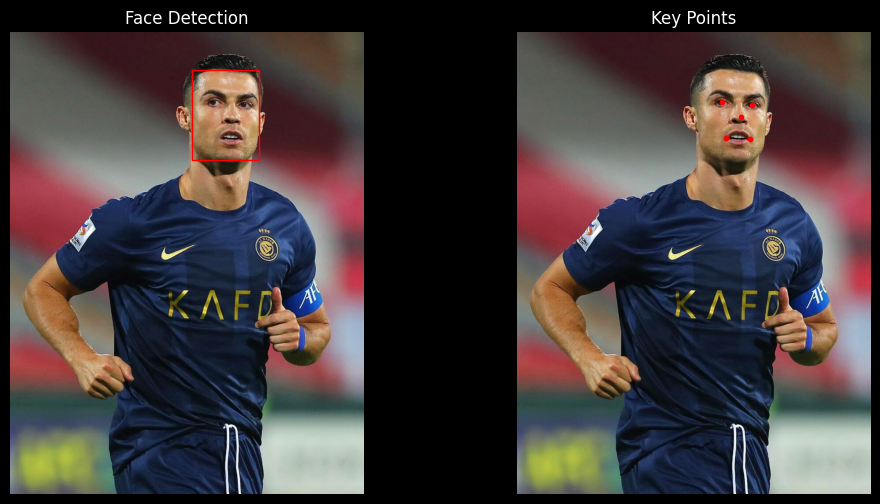

--------------------------------------------------
 The process has been started for detection faces...
 the box coordinates : [110, 16, 41, 56]
 the confidence : 0.9962151646614075
 the key points : {'nose': [np.int64(136), np.int64(49)], 'mouth_right': [np.int64(143), np.int64(56)], 'right_eye': [np.int64(143), np.int64(37)], 'left_eye': [np.int64(125), np.int64(35)], 'mouth_left': [np.int64(122), np.int64(54)]}


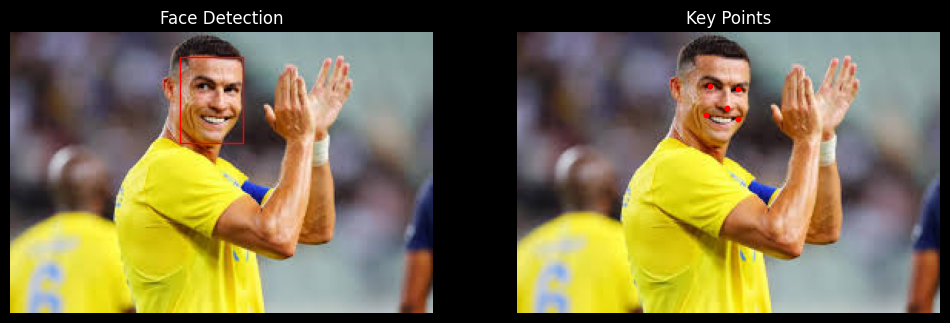

--------------------------------------------------
 The process has been started for detection faces...
 the box coordinates : [78, 20, 43, 60]
 the confidence : 0.9999980926513672
 the key points : {'nose': [np.int64(82), np.int64(54)], 'mouth_right': [np.int64(96), np.int64(67)], 'right_eye': [np.int64(97), np.int64(42)], 'left_eye': [np.int64(82), np.int64(42)], 'mouth_left': [np.int64(83), np.int64(67)]}


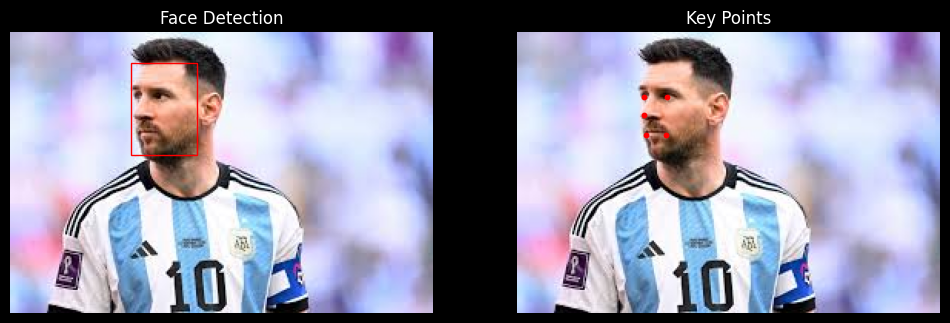

--------------------------------------------------
 The process has been started for detection faces...
 the box coordinates : [120, 29, 40, 59]
 the confidence : 0.9972454309463501
 the key points : {'nose': [np.int64(143), np.int64(62)], 'mouth_right': [np.int64(148), np.int64(74)], 'right_eye': [np.int64(151), np.int64(52)], 'left_eye': [np.int64(132), np.int64(51)], 'mouth_left': [np.int64(132), np.int64(73)]}


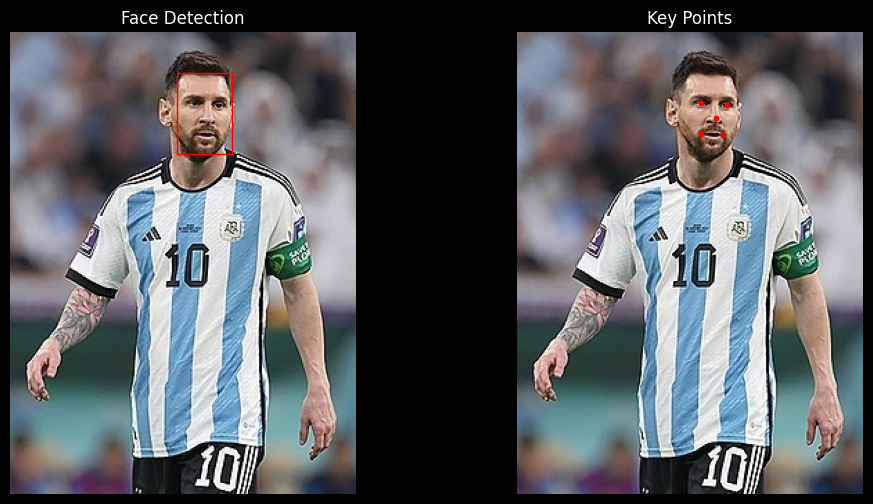

--------------------------------------------------
 The process has been started for detection faces...
 the box coordinates : [125, 23, 21, 29]
 the confidence : 0.9998489618301392
 the key points : {'nose': [np.int64(140), np.int64(38)], 'mouth_right': [np.int64(142), np.int64(45)], 'right_eye': [np.int64(143), np.int64(34)], 'left_eye': [np.int64(133), np.int64(33)], 'mouth_left': [np.int64(134), np.int64(45)]}
 the box coordinates : [12, 26, 16, 22]
 the confidence : 0.8717840909957886
 the key points : {'nose': [np.int64(15), np.int64(37)], 'mouth_right': [np.int64(18), np.int64(42)], 'right_eye': [np.int64(21), np.int64(33)], 'left_eye': [np.int64(16), np.int64(32)], 'mouth_left': [np.int64(14), np.int64(42)]}


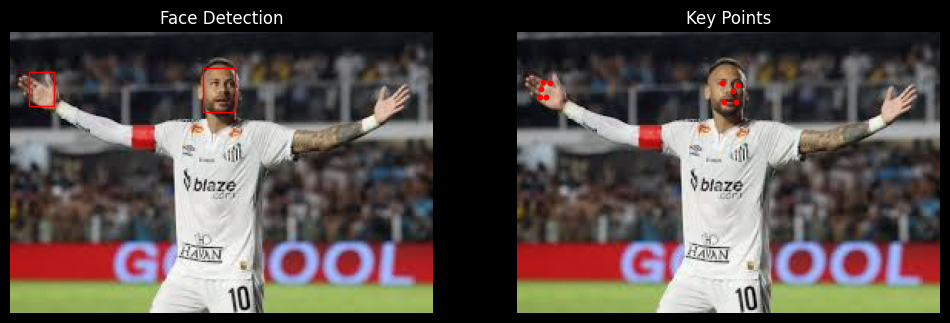

--------------------------------------------------
 The process has been started for detection faces...
 the box coordinates : [92, 47, 51, 78]
 the confidence : 0.9834614992141724
 the key points : {'nose': [np.int64(130), np.int64(92)], 'mouth_right': [np.int64(137), np.int64(102)], 'right_eye': [np.int64(134), np.int64(76)], 'left_eye': [np.int64(113), np.int64(78)], 'mouth_left': [np.int64(114), np.int64(106)]}


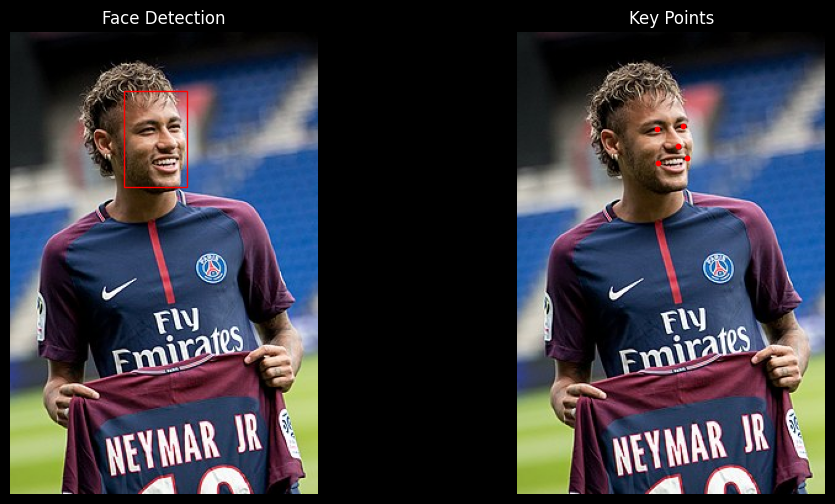

--------------------------------------------------
 The process has been started for detection faces...
 the box coordinates : [34, 81, 220, 303]
 the confidence : 0.9940497875213623
 the key points : {'nose': [np.int64(149), np.int64(237)], 'mouth_right': [np.int64(198), np.int64(297)], 'right_eye': [np.int64(201), np.int64(186)], 'left_eye': [np.int64(97), np.int64(186)], 'mouth_left': [np.int64(101), np.int64(298)]}


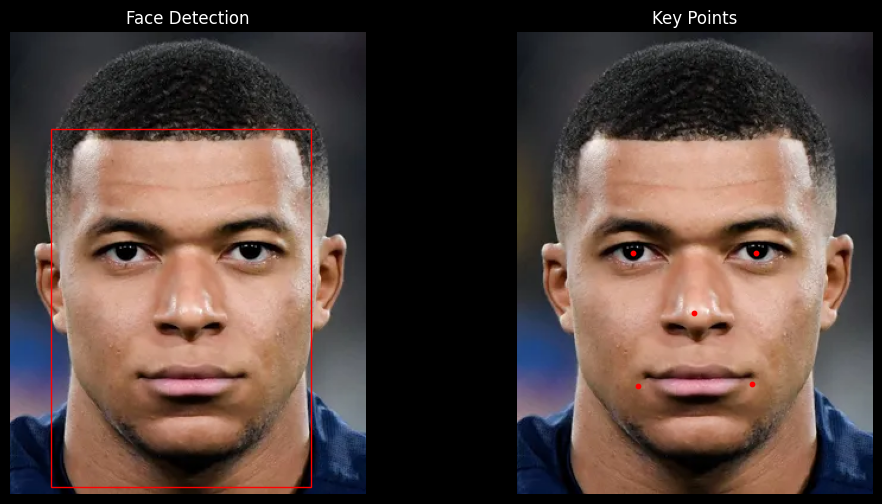

--------------------------------------------------
 The process has been started for detection faces...
 the box coordinates : [240, 75, 273, 347]
 the confidence : 0.9995986819267273
 the key points : {'nose': [np.int64(339), np.int64(258)], 'mouth_right': [np.int64(407), np.int64(334)], 'right_eye': [np.int64(417), np.int64(204)], 'left_eye': [np.int64(291), np.int64(212)], 'mouth_left': [np.int64(299), np.int64(341)]}


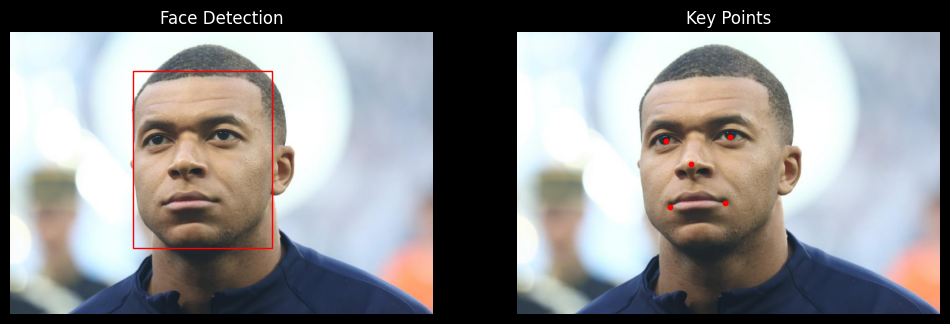

--------------------------------------------------
 The process has been started for detection faces...
 the box coordinates : [508, 109, 196, 250]
 the confidence : 0.9913158416748047
 the key points : {'nose': [np.int64(634), np.int64(267)], 'mouth_right': [np.int64(658), np.int64(306)], 'right_eye': [np.int64(668), np.int64(215)], 'left_eye': [np.int64(583), np.int64(211)], 'mouth_left': [np.int64(587), np.int64(305)]}


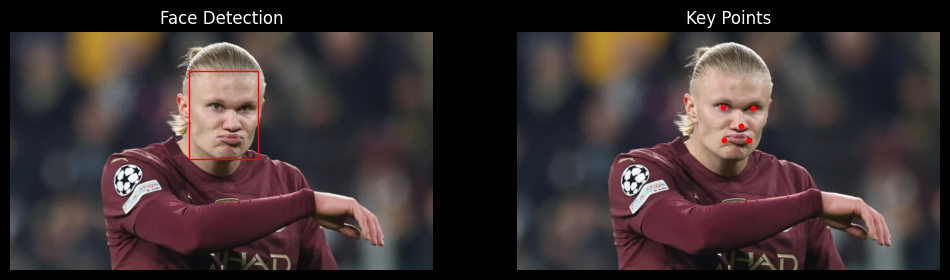

--------------------------------------------------
 The process has been started for detection faces...
 the box coordinates : [82, 31, 52, 75]
 the confidence : 0.998052716255188
 the key points : {'nose': [np.int64(123), np.int64(74)], 'mouth_right': [np.int64(125), np.int64(89)], 'right_eye': [np.int64(129), np.int64(61)], 'left_eye': [np.int64(107), np.int64(58)], 'mouth_left': [np.int64(106), np.int64(87)]}


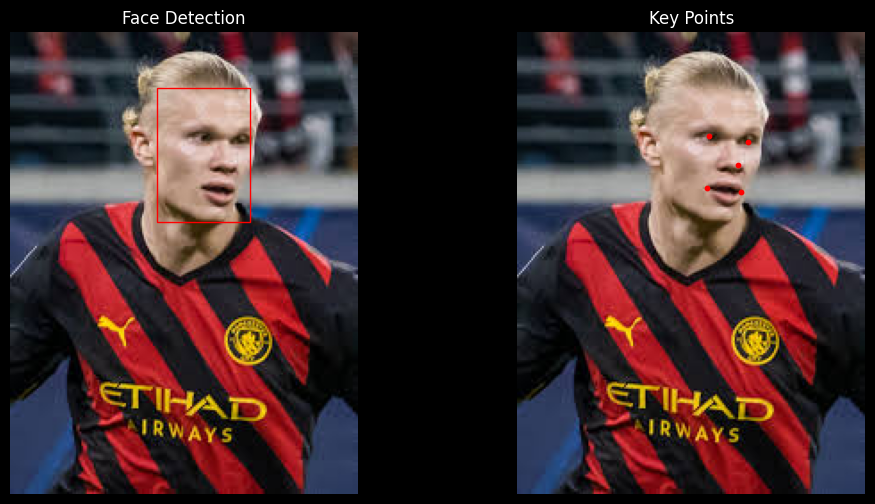

--------------------------------------------------


In [ ]:
for img in image_list:
  Face_Detection(image=img, color='red', size=10)


In [ ]:
import requests
from io import BytesIO
from skimage import io
import matplotlib.pyplot as plt

url = 'https://upload.wikimedia.org/wikipedia/commons/9/99/Muhammad_Ali_1967.jpg'

headers = {'User-Agent': 'Mozilla/5.0'}  # Fake browser request
response = requests.get(url, headers=headers)

if response.status_code == 200:
    image = io.imread(BytesIO(response.content))
    plt.imshow(image)
    plt.axis('off')
    plt.show()
else:
    print("Failed to retrieve image:", response.status_code)


Failed to retrieve image: 404


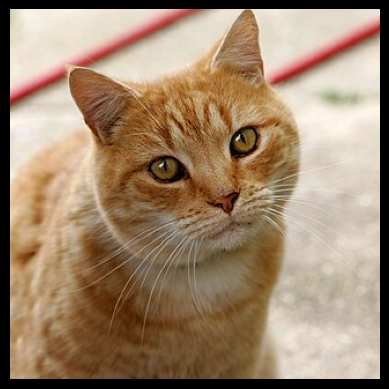

In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/320px-Cat03.jpg'
image = io.imread(url)
plt.imshow(image)
plt.axis('off')
plt.show()


In [ ]:
Face_Detection(url=url,size=2)

NameError: name 'Face_Detection' is not defined

In [ ]:
def Face_Detection_FaceNet(image, margin=0.2):
    model = MTCNN()
    detection = model.detect_faces(image)
    if detection:
        x, y, width, height = detection[0]['box']
        margin = margin
        x_min, y_min = max(x - int(margin * width), 0), max(y - int(margin * height), 0)
        x_max = min(x + width + int(margin * width), image.shape[1])
        y_max = min(y + height + int(margin * height), image.shape[0])
        face_box = image[y_min:y_max, x_min:x_max]
        image_with_face_detection = cv2.resize(face_box, (160, 160))
        return image_with_face_detection
    else:
        return None


In [ ]:
def Embedding(fimage_with_face_detection):
    model = FaceNet()
    embedding_vector = model.embeddings([fimage_with_face_detection])[0]
    return embedding_vector


In [ ]:

def Similarity_Measurement(embedding_vector1, embedding_vector2, threshold=0.7):
    distance = cosine(embedding_vector1, embedding_vector2)
    scan_distance = distance
    return scan_distance < threshold

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

def reading_img(path):
    # Reads an image from the given path (local file or URL)
    return io.imread(path)

def Comparison_Faces(img1, img2):
    image1 = reading_img(img1)
    image2 = reading_img(img2)

    face1 = Face_Detection_FaceNet(image=image1, margin=0.2)
    face2 = Face_Detection_FaceNet(image=image2, margin=0.2)

    if face1 is not None and face2 is not None:
        plt.style.use('dark_background')
        plt.figure(figsize=(12, 6))
        plt.suptitle('Faces Comparison')

        plt.subplot(1, 2, 1)
        plt.imshow(face1)
        plt.title(f'Image 1:\nThe shape {face1.shape}')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(face2)
        plt.title(f'Image 2:\nThe shape {face2.shape}')
        plt.axis('off')

        plt.show()

        embed1 = Embedding(face1)
        embed2 = Embedding(face2)

        return Similarity_Measurement(embed1, embed2)
    else:
        return False


In [ ]:
def Showing(image_path1, image_path2):
    print(f"{Color.BOLD}The process has been started for faces comparison...{Color.END}")

    checking = Comparison_Faces(img1=image_path1, img2=image_path2)

    if checking:
        print(f"Result: {Color.GREEN}The person in both images is the {Color.BOLD}same{Color.END}")
    else:
        print(f"Result: {Color.RED}The person in both images is not the {Color.BOLD}same{Color.END}")

    print('-' * 40)


The process has been started for faces comparison...


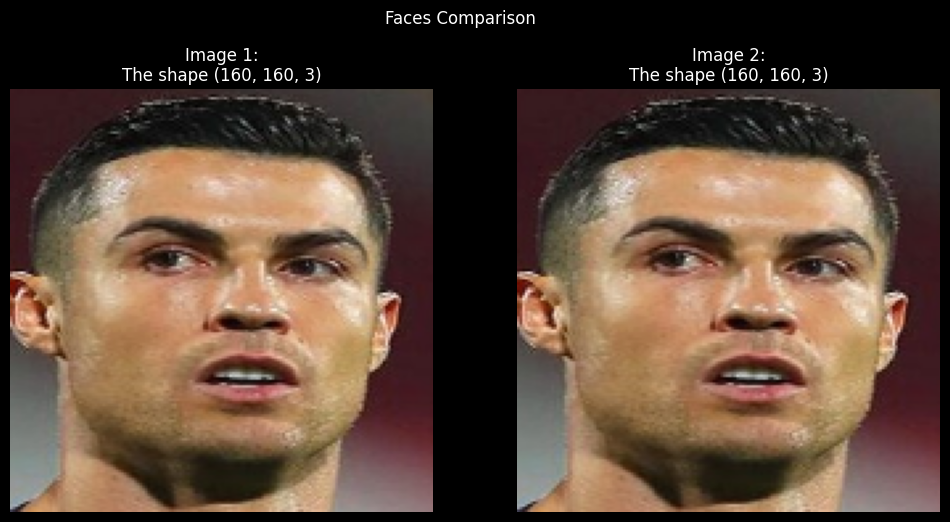

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Result: The person in both images is the same
----------------------------------------
The process has been started for faces comparison...


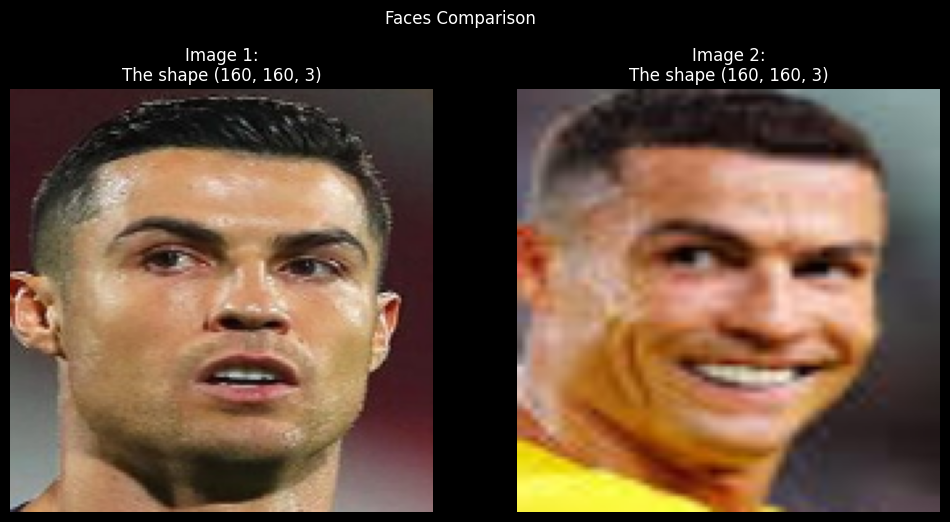

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Result: The person in both images is the same
----------------------------------------
The process has been started for faces comparison...


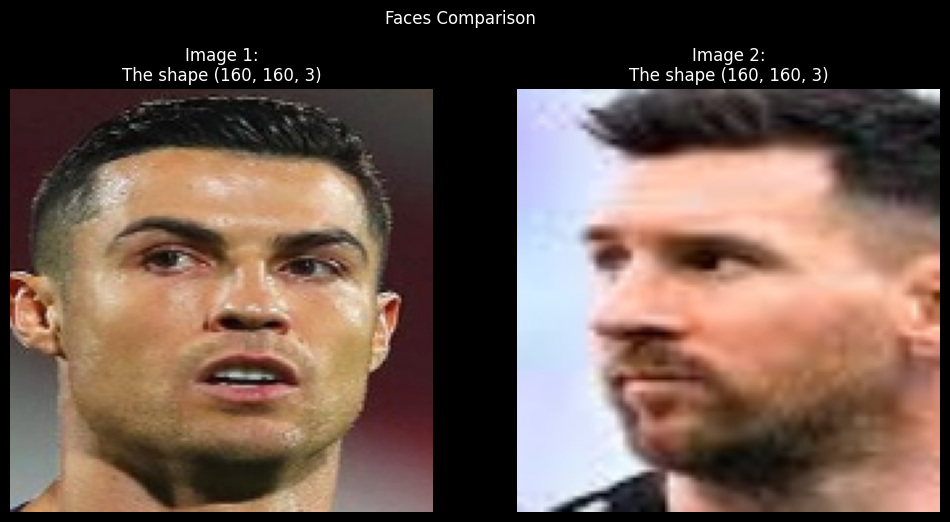

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Result: The person in both images is not the same
----------------------------------------
The process has been started for faces comparison...


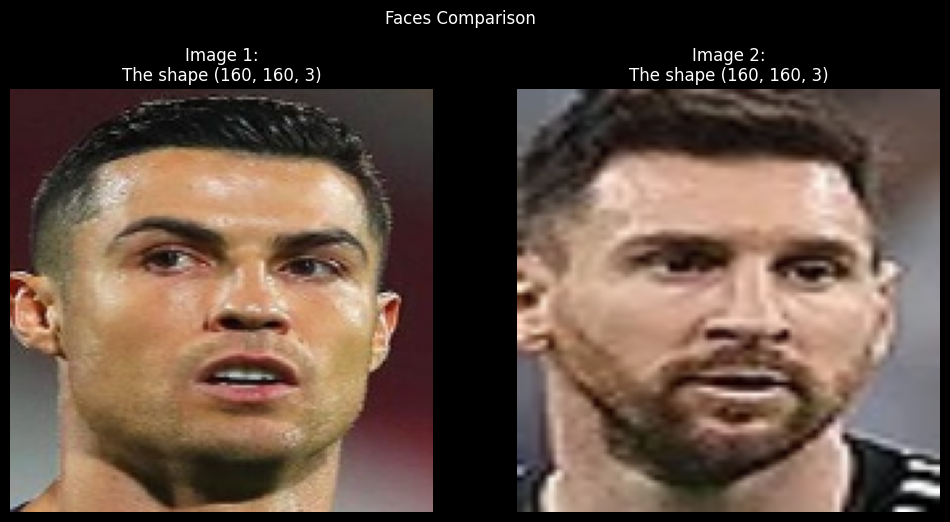

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Result: The person in both images is not the same
----------------------------------------
The process has been started for faces comparison...


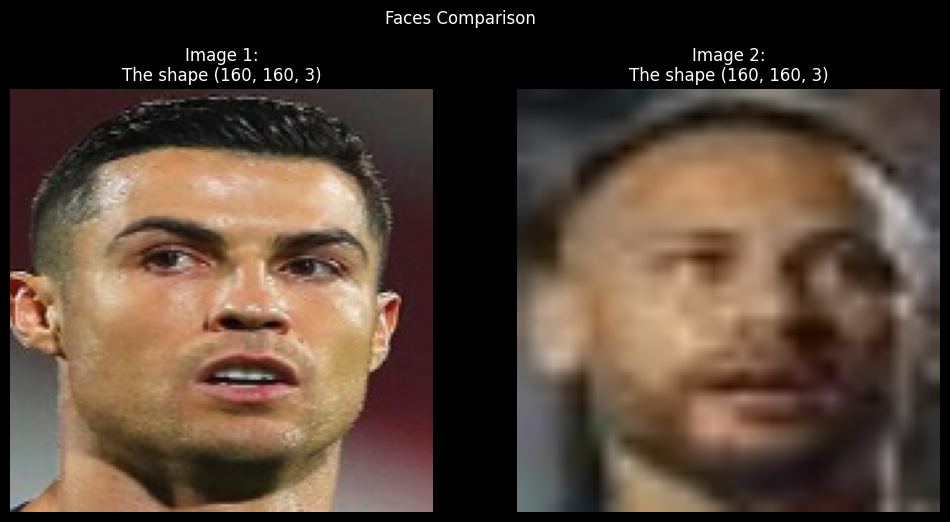

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Result: The person in both images is not the same
----------------------------------------
The process has been started for faces comparison...


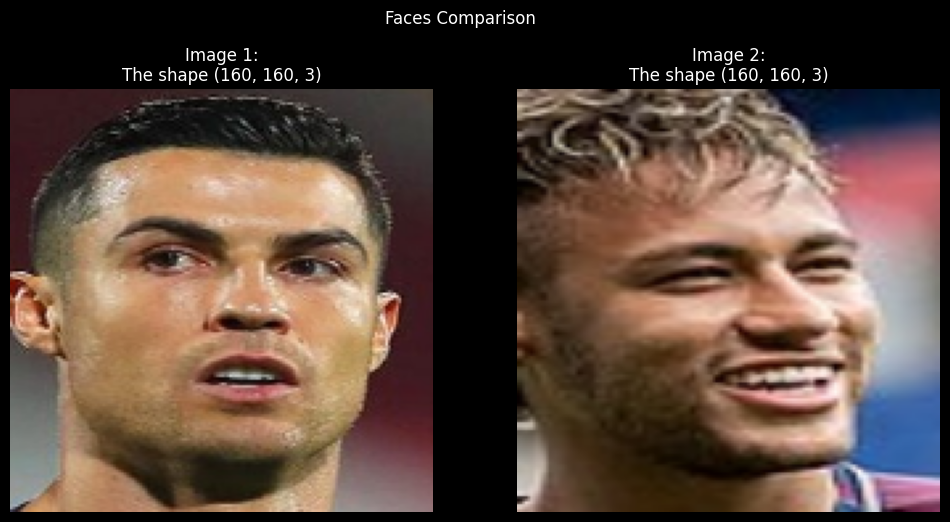

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Result: The person in both images is not the same
----------------------------------------
The process has been started for faces comparison...


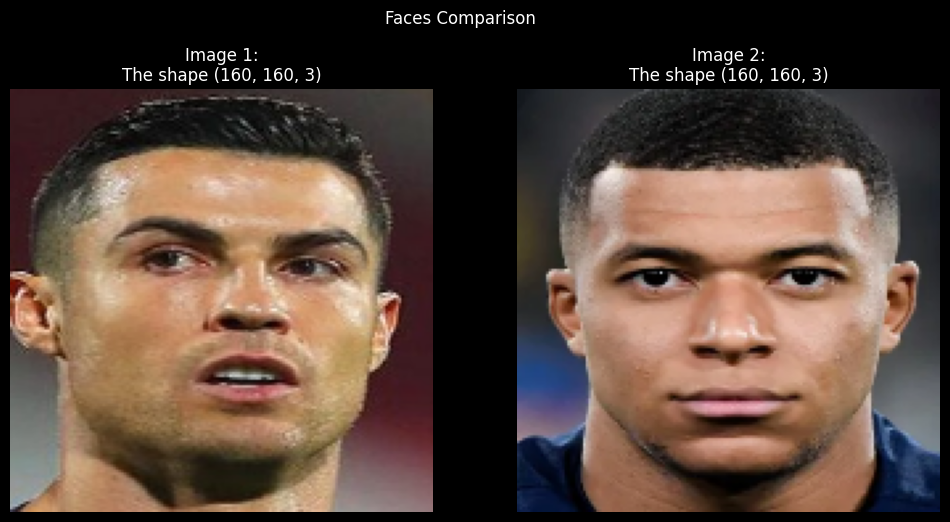

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
Result: The person in both images is not the same
----------------------------------------
The process has been started for faces comparison...


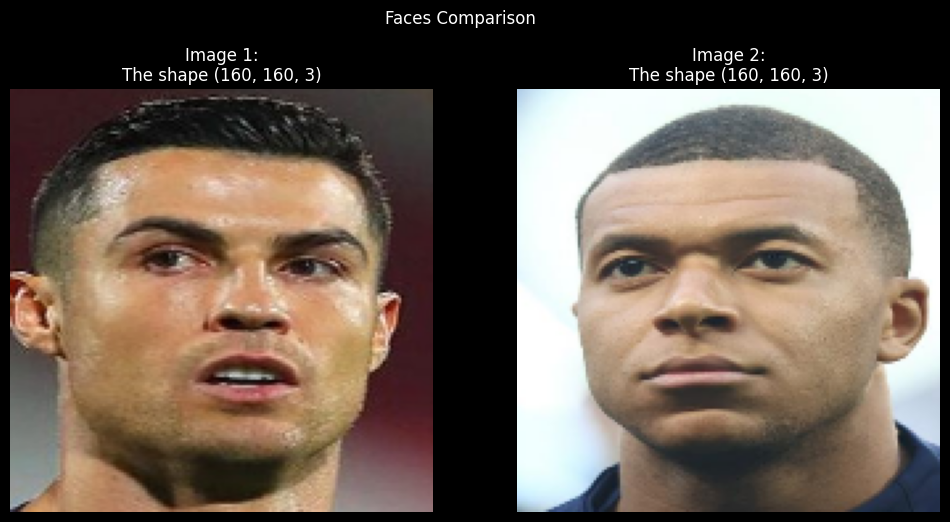

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Result: The person in both images is not the same
----------------------------------------
The process has been started for faces comparison...


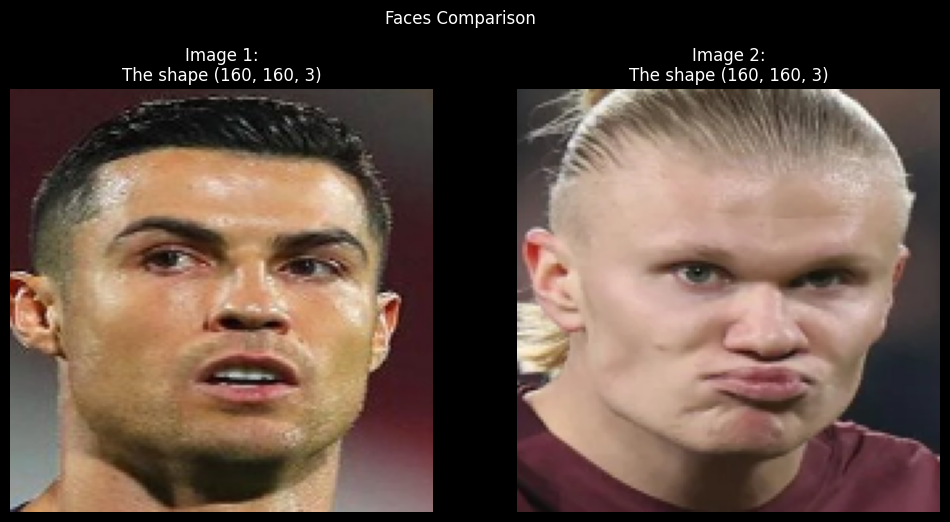

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Result: The person in both images is not the same
----------------------------------------
The process has been started for faces comparison...


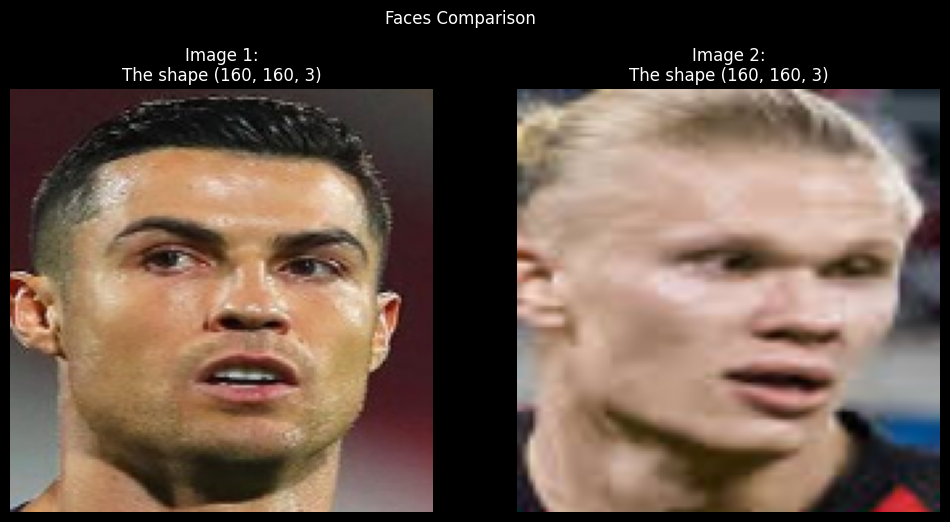

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Result: The person in both images is not the same
----------------------------------------


In [ ]:
for img in image_list:
  Showing(image_list[0],img)